In [1]:
## ----setup, echo=FALSE--------------------------------------------------------
if (dir.exists("result/plots")) {
  unlink("result/plots", recursive = TRUE)
}
knitr::opts_chunk$set(fig.path = "result/plots/")

In [2]:
## ----warning=F, message=F-----------------------------------------------------
# Install Required Packages (if not already installed)
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
if (!requireNamespace("DESeq2", quietly = TRUE)) {
  BiocManager::install("DESeq2")
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.26), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘XVector’, ‘formatR’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘Seqinfo’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'pkgdown', 'purrr', 'stringr'



In [4]:
if (!requireNamespace("RUVSeq", quietly = TRUE)) {
  BiocManager::install("RUVSeq")
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.26), R 4.5.2 (2025-10-31)

Installing package(s) 'RUVSeq'

also installing the dependencies ‘deldir’, ‘RcppEigen’, ‘RCurl’, ‘rjson’, ‘cigarillo’, ‘png’, ‘jpeg’, ‘interp’, ‘filelock’, ‘plogr’, ‘XML’, ‘BiocIO’, ‘restfulr’, ‘GenomicAlignments’, ‘pwalign’, ‘hwriter’, ‘latticeExtra’, ‘Rhtslib’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘BiocFileCache’, ‘RSQLite’, ‘KEGGREST’, ‘rtracklayer’, ‘statmod’, ‘ShortRead’, ‘aroma.light’, ‘Rsamtools’, ‘biomaRt’, ‘Biostrings’, ‘AnnotationDbi’, ‘GenomicFeatures’, ‘limma’, ‘EDASeq’, ‘edgeR’


Old packages: 'pkgdown', 'purrr', 'stringr'



In [5]:
if (!requireNamespace("pheatmap", quietly = TRUE)) {
  BiocManager::install("pheatmap")
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.26), R 4.5.2 (2025-10-31)

Installing package(s) 'pheatmap'

Old packages: 'pkgdown', 'purrr', 'stringr'



In [6]:
if (!requireNamespace("RColorBrewer", quietly = TRUE)) {
  BiocManager::install("RColorBrewer")
}

In [7]:
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}

In [8]:
if (!requireNamespace("ggrepel", quietly = TRUE)) {
  install.packages("ggrepel")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
# Load Packages
library(DESeq2)
library(RUVSeq)
library(pheatmap)
library(RColorBrewer)
library(ggplot2)
library(ggrepel)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The follo

In [11]:
## ----warning=FALSE, message=FALSE---------------------------------------------
# Import Gene Counts
COUNTS <- read.csv(file="/content/GSE227516_counts.csv", header=TRUE, row.names=1)
head(COUNTS)

,P1,P10,P2,P3,P4,P5,P6,P7,P8,P9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001,1755,1226,2333,1330,1507,1287,1081,853,1108,1038
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,102,43,122,60,57,76,40,48,17,27
ENSMUSG00000000031,3,2,0,2,1,7,0,1,0,0
ENSMUSG00000000037,4,11,12,15,7,8,8,13,7,7
ENSMUSG00000000049,4,0,24,3,11,5,0,0,2,4


In [13]:
## -----------------------------------------------------------------------------
# Import Sample Information
META <- read.csv(file="/content/sample_information.csv", header=TRUE)
head(META)

,sample,condition
,<chr>,<chr>
1,P1,sedentary
2,P2,sedentary
3,P3,sedentary
4,P4,sedentary
5,P5,sedentary
6,P6,exercise


In [14]:
## -----------------------------------------------------------------------------
# Reorder columns
COUNTS <- COUNTS[, c("P1", paste0("P", 2:9), "P10")]
head(COUNTS)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001,1755,2333,1330,1507,1287,1081,853,1108,1038,1226
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,102,122,60,57,76,40,48,17,27,43
ENSMUSG00000000031,3,0,2,1,7,0,1,0,0,2
ENSMUSG00000000037,4,12,15,7,8,8,13,7,7,11
ENSMUSG00000000049,4,24,3,11,5,0,0,2,4,0


In [15]:
## -----------------------------------------------------------------------------
# Rounding off and convert to matrix
COUNTS <- round(COUNTS)
COUNTS <- as.matrix(COUNTS)

In [16]:
## -----------------------------------------------------------------------------
# List unique sample conditions
unique(META$condition)

[1] "sedentary" "exercise"

In [17]:
## ----warning=FALSE, message=FALSE---------------------------------------------
# Creating DESeq2 Dataset
dds <- DESeqDataSetFromMatrix(countData = COUNTS,
                              colData=META,
                              design=~condition)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [18]:
## -----------------------------------------------------------------------------
dim(dds)

[1] 52178    10

In [19]:
## -----------------------------------------------------------------------------
# Filtering low count genes
threshold <- 10
dds <- dds[ rowMeans(counts(dds)) >= threshold,]

In [20]:
## ----warning=FALSE, message=FALSE---------------------------------------------
# DESeq2 Analysis
prdds <- DESeq(dds)
prdds

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



class: DESeqDataSet 
dim: 15563 10 
metadata(1): version
assays(4): counts mu H cooks
rownames(15563): ENSMUSG00000000001 ENSMUSG00000000028 ...
  ENSMUSG00002076161 ENSMUSG00002076173
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(10): P1 P2 ... P9 P10
colData names(3): sample condition sizeFactor

In [21]:
## -----------------------------------------------------------------------------
# Normalization
norm_counts <- counts(prdds, normalized = TRUE)
norm_counts <- as.data.frame(norm_counts)
head(norm_counts)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001,1904.05489,2266.27915,1294.78609,1173.74110,1113.61972,1096.60040,1004.79919,1173.90924,1166.26505,1061.99960
ENSMUSG00000000028,110.66302,118.51095,58.41140,44.39499,65.76154,40.57726,56.54204,18.01124,30.33637,37.24795
ENSMUSG00000000056,547.89044,525.52808,232.67209,215.74405,207.66801,182.59766,171.98204,166.33913,180.89468,168.04888
ENSMUSG00000000058,70.52055,28.17064,94.43177,71.65506,73.54909,82.16895,63.60980,74.16394,101.12125,82.29198
ENSMUSG00000000078,1118.56444,994.71489,583.14050,448.62301,461.19604,597.50012,400.50612,464.05438,1012.33604,498.08301
ENSMUSG00000000085,192.03289,268.10675,445.87370,375.41023,402.35677,463.59517,528.90368,481.00613,383.13717,409.72742


In [22]:
## -----------------------------------------------------------------------------
# Transformation
mks <- estimateSizeFactors(dds)
rld <- rlogTransformation(prdds, blind = FALSE)
vsd <- varianceStabilizingTransformation(dds, blind=FALSE)

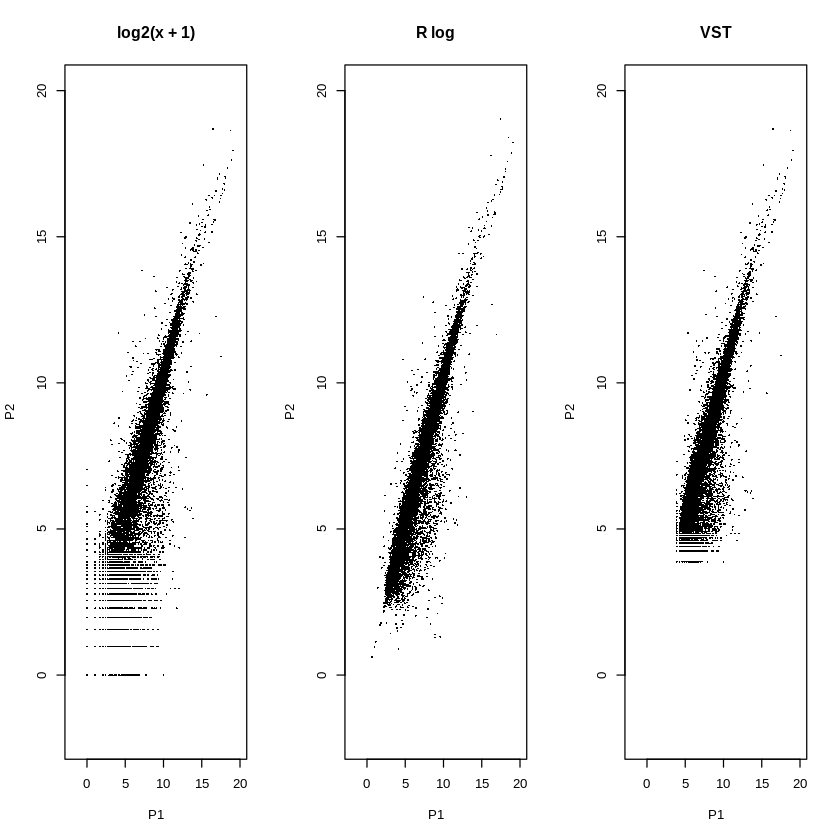

In [23]:
## ----scatter_plots, dev='png', fig.show='hide'--------------------------------
# Scatter Plots Comparison
par(mfrow=c(1, 3))
lims <- c(-2, 20)
plot(log2(counts(mks, normalized=TRUE)[,1:2] + 1),pch=16, cex=0.3, main="log2(x + 1)", xlim=lims, ylim=lims)
plot(assay(rld)[,1:2], pch=16, cex=0.3, main="R log", xlim=lims, ylim=lims)
plot(assay(vsd)[,1:2], pch=16, cex=0.3, main="VST", xlim=lims, ylim=lims)

Here is a detailed interpretation of the scatter plots from cell 23:

*   **Purpose:** These scatter plots compare the expression levels of two samples after different data transformations. The goal is to visualize how each transformation affects the variance of the data, particularly at different expression levels.
*   **`log2(x + 1)` Plot:**
    *   **Transformation:** A simple log base 2 transformation is applied to the raw counts, with a pseudocount of 1 added to handle zero values.
    *   **Appearance:** Typically shows a "fan" shape.
    *   **Interpretation:** The fan shape indicates that the variability in gene expression is not constant across all expression levels. Genes with higher average counts tend to have higher variance. This is a characteristic of raw count data and suggests that simple log transformation alone does not fully stabilize the variance.
*   **`R log` (rlogTransformation) Plot:**
    *   **Transformation:** The regularized log transformation (rlog) is applied. This method uses a model to estimate the variance-mean relationship and shrinks the variance of low-count genes towards a common value.
    *   **Appearance:** The points are expected to be more tightly clustered around the diagonal line compared to the `log2(x + 1)` plot.
    *   **Interpretation:** The reduced fan shape demonstrates that the rlog transformation has effectively stabilized the variance across the range of expression values. This makes the data more suitable for downstream analyses that assume homoskedasticity (constant variance).
*   **`VST` (varianceStabilizingTransformation) Plot:**
    *   **Transformation:** The variance stabilizing transformation (VST) is applied. Similar to rlog, VST aims to stabilize the variance by using a different mathematical approach based on the dispersion estimates from the DESeq2 model.
    *   **Appearance:** The points should also be more evenly distributed around the diagonal, showing a reduction in the variance-mean dependency.
    *   **Interpretation:** The VST also effectively stabilizes the variance. Both rlog and VST are suitable for transforming count data for analyses like PCA and clustering, where variance stabilization is important. The choice between rlog and VST can depend on the specific dataset and downstream analysis.
*   **Overall Comparison:** By comparing these three plots, you can visually assess the effectiveness of the rlog and VST transformations in stabilizing the variance of your gene expression data. Ideally, the rlog and VST plots will show a much more consistent spread of points around the diagonal than the simple `log2(x + 1)` plot.

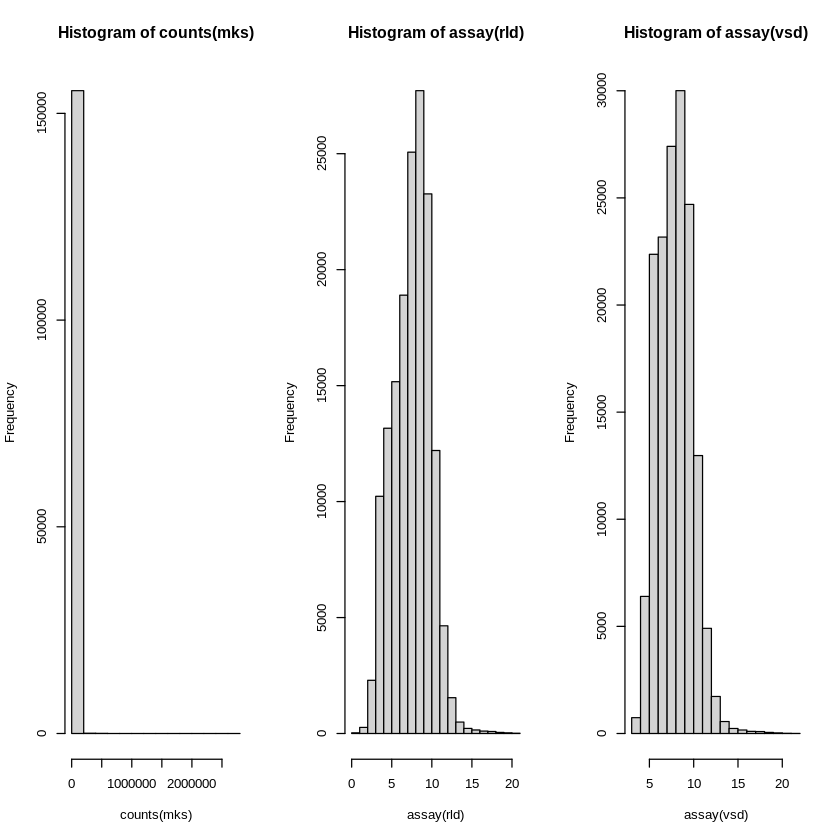

In [24]:
## ----hist_plots, dev='png', fig.show='hide'-----------------------------------
# Histograms Comparison
par(mfrow=c(1, 3))
hist(counts(mks))
hist(assay(rld))
hist(assay(vsd))

Here is a detailed interpretation of the histogram plots from cell 24:

*   **Purpose:** These histograms show the distribution of gene expression values across all samples after different data transformations. They help visualize how each transformation affects the overall shape and spread of the data.
*   **Histogram of `counts(mks)`:**
    *   **Transformation:** This histogram represents the distribution of the raw, normalized counts.
    *   **Appearance:** Typically shows a skewed distribution, with a large number of genes having low counts and a smaller number of genes with high counts.
    *   **Interpretation:** This skewed distribution is characteristic of raw count data from RNA-Seq experiments. It reflects the biological reality where many genes are expressed at low levels, while only a few are highly expressed.
*   **Histogram of `assay(rld)`:**
    *   **Transformation:** This histogram shows the distribution of the data after applying the regularized log transformation (rlog).
    *   **Appearance:** The distribution is expected to be more symmetric and closer to a normal distribution compared to the raw count histogram.
    *   **Interpretation:** The rlog transformation effectively pulls in the long tail of high counts and spreads out the low counts, resulting in a more even distribution. This makes the data more suitable for methods that assume normally distributed data.
*   **Histogram of `assay(vsd)`:**
    *   **Transformation:** This histogram shows the distribution of the data after applying the variance stabilizing transformation (VST).
    *   **Appearance:** Similar to the rlog histogram, the VST histogram is also expected to be more symmetric and closer to a normal distribution than the raw count histogram.
    *   **Interpretation:** The VST also transforms the data to achieve a more symmetric distribution, which is beneficial for downstream analyses that assume normality. The shape of the VST histogram might differ slightly from the rlog histogram depending on the dataset.
*   **Overall Comparison:** By comparing these three histograms, you can visually assess how the rlog and VST transformations have altered the distribution of your gene expression data. Both transformations aim to make the data more amenable to statistical methods that assume normality or constant variance.

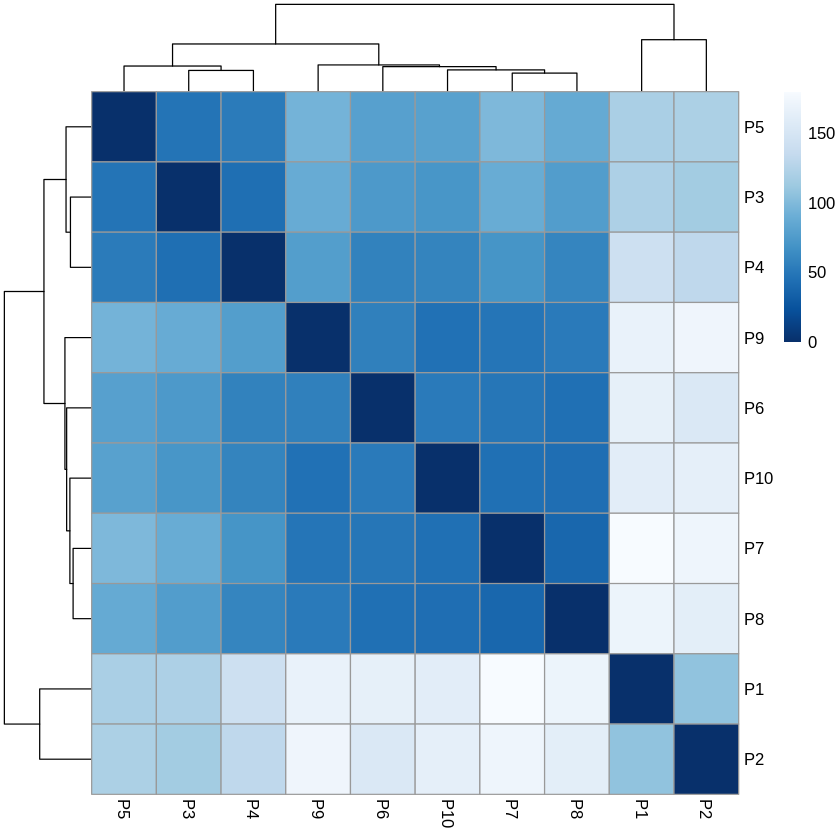

In [25]:
## ----s2s_heatmap_plot, dev='png', fig.show='hide'-----------------------------
# Sample-to-sample distances
sample_dist <- dist(t(assay(rld)))
sample_dist_matrix <- as.matrix(sample_dist)
colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)
pheatmap(sample_dist_matrix,
         clustering_distance_rows=sample_dist,
         clustering_distance_cols=sample_dist,
         col=colors,)

Here is a detailed interpretation of the heatmap plot from cell 25:

*   **Purpose:** This heatmap visualizes the sample-to-sample distances based on the transformed gene expression data (rlog transformed in this case). It helps assess the similarity between samples and identify potential batch effects or outliers.
*   **Input Data:** The heatmap is generated from a distance matrix calculated from the transpose of the assay data of the rlog-transformed DESeq2 object (`assay(rld)`). The transpose is taken so that the samples are the rows and columns of the distance matrix.
*   **Color Scale:** The color intensity in the heatmap represents the distance between samples. Darker colors (blues in this case, as specified by `colorRampPalette`) indicate smaller distances (higher similarity), while lighter colors indicate larger distances (lower similarity).
*   **Rows and Columns:** Both the rows and columns of the heatmap represent the samples.
*   **Diagonal:** The diagonal of the heatmap represents the distance of a sample to itself, which is always zero (indicated by the darkest color).
*   **Symmetry:** The heatmap is symmetric because the distance from sample A to sample B is the same as the distance from sample B to sample A.
*   **Clustering:** Hierarchical clustering is applied to both the rows and columns of the distance matrix. The dendrograms on the sides of the heatmap show how the samples are clustered based on their overall gene expression profiles. Samples that are more similar will be clustered closer together.
*   **Interpretation:** By examining the heatmap and the dendrograms, you can identify:
    *   **Sample Similarities:** Samples with darker squares at their intersection are more similar in terms of gene expression.
    *   **Sample Groups:** Samples that cluster together in the dendrograms are more similar to each other than to samples in other clusters. This can help validate experimental design (e.g., samples from the same treatment group should cluster together) or identify unexpected groupings.
    *   **Outliers:** Samples that are consistently distant from all other samples in their group or from all samples in general might be outliers.
    *   **Batch Effects:** If samples from different experimental batches cluster separately, it might indicate a batch effect that needs to be addressed.

In this specific heatmap, you would look for clustering patterns that align with your experimental conditions ("sedentary" and "exercise") as defined in your `colData`. Ideally, samples within the same condition would cluster together, and the two conditions would form distinct clusters.

using ntop=500 top features by variance



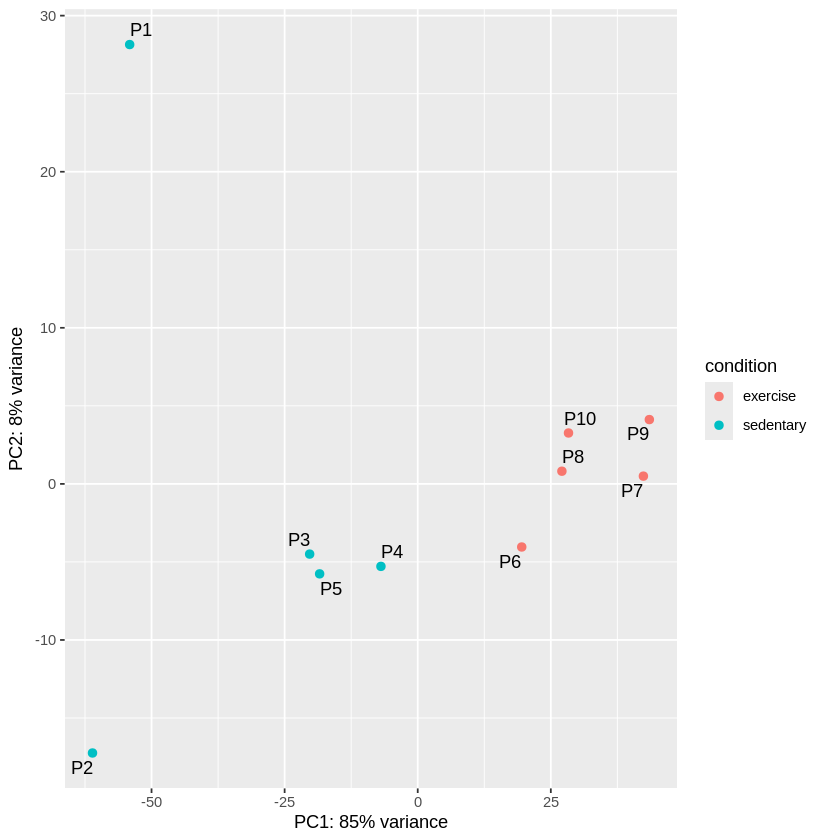

In [26]:
## ----pca_plot, dev='png', fig.show='hide', message=FALSE, warning=FALSE-------
# PCA Plot
pca_data <- plotPCA(rld, intgroup = c("condition"), returnData = TRUE)
ggplot(pca_data, aes(x = PC1, y = PC2)) +
  geom_point(size = 2, aes(color = condition)) +
  geom_text_repel(aes(label = rownames(pca_data)), nudge_x = 0, nudge_y = 0) +
  xlab(paste0("PC1: ", round(attr(pca_data, "percentVar")[1], 2) * 100, "% variance")) +
  ylab(paste0("PC2: ", round(attr(pca_data, "percentVar")[2], 2) * 100, "% variance"))


Here is a detailed interpretation of the PCA plot from cell 26:

*   **Purpose:** This PCA plot (Principal Component Analysis) is used to visualize the relationships between samples based on their overall gene expression profiles. It reduces the dimensionality of the data while retaining most of the variance.
*   **Input Data:** The PCA is performed on the transformed gene expression data (`rld` in this case, which is rlog-transformed). The `intgroup = c("condition")` argument indicates that the samples will be colored by their 'condition' variable.
*   **Axes (PC1 and PC2):** The x-axis represents the first principal component (PC1), and the y-axis represents the second principal component (PC2). These are the directions in the data that explain the largest amounts of variance. The percentage of variance explained by each PC is shown on the axis labels.
*   **Points:** Each point on the plot represents a single sample.
*   **Color:** The color of each point indicates the condition of the sample (sedentary or exercise), as specified by the `intgroup` argument. This helps to visually assess whether the samples cluster according to their experimental condition.
*   **Labels:** The `geom_text_repel` layer adds labels to each point, which are the sample names (rownames of `pca_data`). `ggrepel` is used to prevent overlapping labels.
*   **Interpretation:** By examining the PCA plot, you can identify:
    *   **Sample Clustering:** Samples that are closer together in the plot are more similar in their overall gene expression profiles. Ideally, samples from the same experimental condition should cluster together.
    *   **Separation of Groups:** If the different conditions form distinct clusters, it suggests that the experimental treatment has a significant impact on gene expression. The distance between the clusters indicates the magnitude of the difference between the groups.
    *   **Variability within Groups:** The spread of points within a cluster indicates the variability among samples within that condition.
    *   **Outliers:** Samples that are far away from the main clusters might be outliers.
    *   **Major Sources of Variation:** PC1 and PC2 represent the largest sources of variation in your data. If the samples separate clearly along PC1 or PC2 according to your experimental condition, it means that the condition is a major driver of the observed gene expression differences.

In this specific PCA plot, you would expect to see the "sedentary" and "exercise" samples forming separate clusters if there are significant differences in gene expression between the two conditions. The extent of the separation would indicate how strongly the exercise intervention has influenced gene expression.

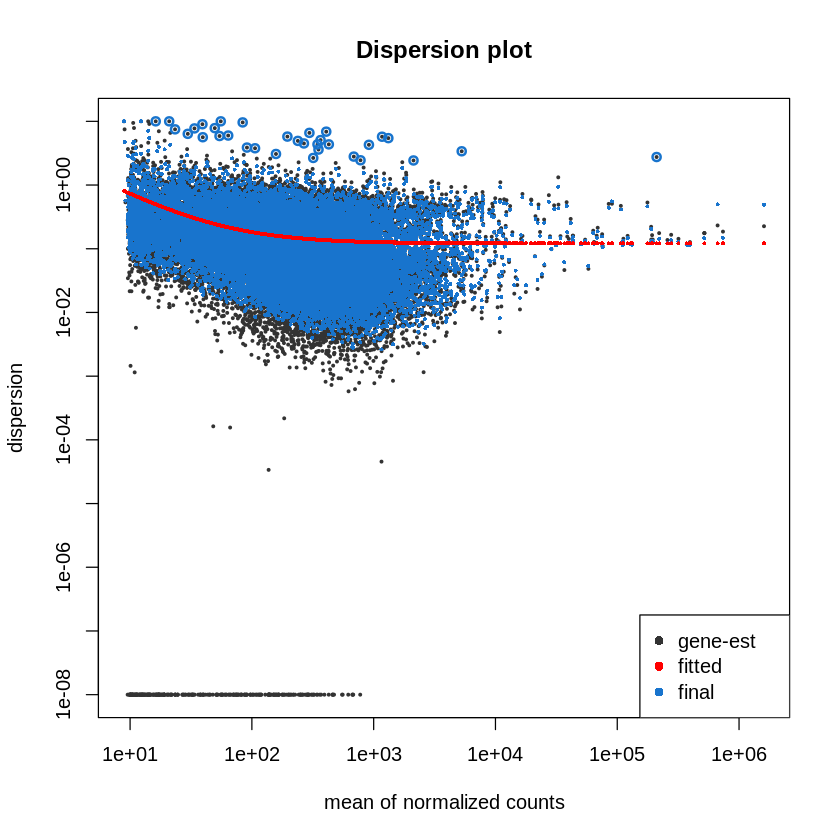

In [27]:
## ----dispersion_plot, dev='png', fig.show='hide'------------------------------
# Dispersion Plot
plotDispEsts(prdds, main = "Dispersion plot",
             genecol="gray20", fitcol="red",
             finalcol="dodgerblue3"
)

Here is a detailed interpretation of the Dispersion plot from cell 27:

*   **Purpose:** The dispersion plot visualizes the relationship between the estimated dispersion and the mean of the normalized counts for each gene. It is a crucial plot in DESeq2 analysis as it shows how well the dispersion model fits the data.
*   **X-axis:** Represents the mean of normalized counts across all samples for each gene. This is often referred to as the "average expression level".
*   **Y-axis:** Represents the estimated dispersion for each gene. Dispersion is a measure of the gene's variability across samples, taking into account the mean.
*   **Gray points:** Each gray point represents a single gene in your dataset. Their position on the plot shows the estimated dispersion for that gene at its average expression level.
*   **Red line:** This is the "fitted" or "smooth" curve. DESeq2 models the relationship between dispersion and mean expression. This line represents the expected dispersion for genes with a given mean expression, based on the fitted model.
*   **Dodgerblue3 points:** These points represent the "final" dispersion estimates used in the differential expression analysis. These estimates are a result of shrinking the gene-wise dispersion estimates (gray points) towards the fitted curve (red line). This shrinkage helps to stabilize the dispersion estimates, especially for genes with low counts.
*   **Interpretation:**
    *   **Relationship between mean and dispersion:** You should observe a trend where dispersion is higher for genes with low mean counts and decreases as the mean count increases. This is a typical pattern in RNA-Seq data.
    *   **Fit of the model:** The red fitted curve should generally follow the trend of the gray points. A good fit indicates that the model is capturing the overall dispersion-mean relationship in your data.
    *   **Shrinkage:** The dodgerblue3 points should be closer to the red fitted curve than the gray points, especially for genes with low mean counts. This visually demonstrates the effect of dispersion shrinkage, which is a key step in DESeq2 to improve the power of differential expression testing.
    *   **Outliers:** Points that are far away from the fitted curve might represent genes with unusually high or low variability.
*   **Overall Assessment:** The dispersion plot helps you evaluate the quality of your data and the appropriateness of the DESeq2 model. A well-behaved dispersion plot, with the gray points following a clear trend and the blue points shrunk towards the fitted curve, indicates that the dispersion estimation was successful and you can proceed with differential expression testing with confidence.

In [28]:
## -----------------------------------------------------------------------------
# DESeq2 Result
res05 <- results(prdds, alpha = 0.05)
res05 <- na.omit(res05)


In [29]:
## -----------------------------------------------------------------------------
# Order by adjusted p-value
res05ordered <- res05[order(res05$padj),]
head(as.data.frame(res05ordered))


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000066687,154.79197,-4.649220,0.4674371,-9.946194,2.620137e-23,4.056758e-19
ENSMUSG00000111202,681.51463,-2.146136,0.2539254,-8.451838,2.867535e-17,2.219902e-13
ENSMUSG00000030483,1319.06242,4.732123,0.5681532,8.328956,8.155871e-17,4.209245e-13
ENSMUSG00000036814,1022.63610,4.742794,0.6092232,7.784985,6.972128e-15,2.698736e-11
ENSMUSG00000031490,518.15350,-1.337340,0.1730918,-7.726192,1.108116e-14,2.859494e-11
ENSMUSG00000044309,80.23379,3.023784,0.3903985,7.745379,9.529719e-15,2.859494e-11


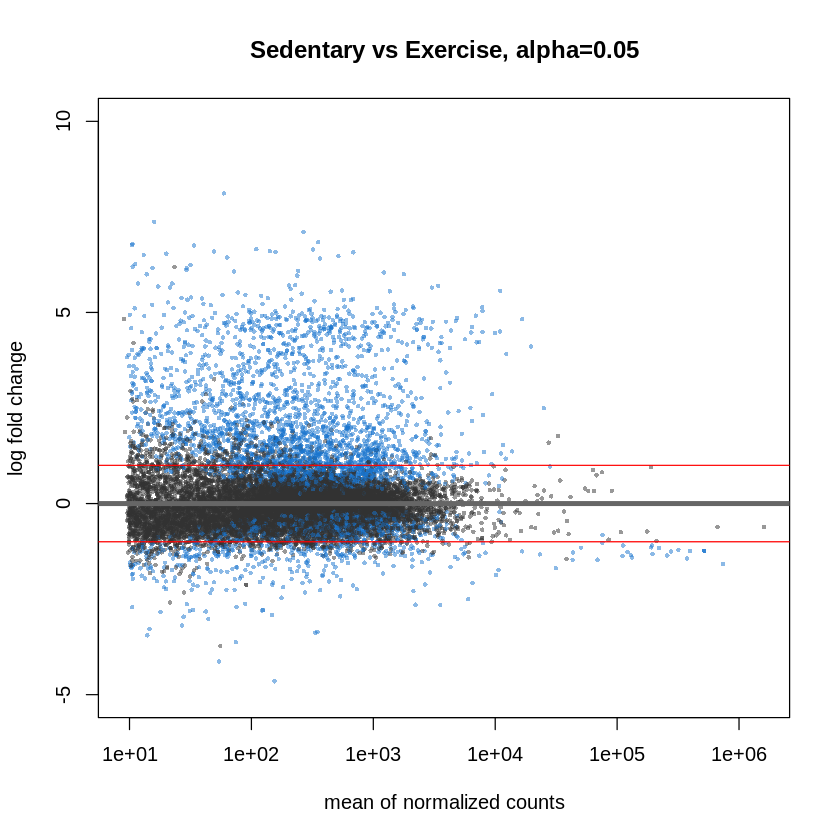

In [30]:
## ----ma_plot, dev='png', fig.show='hide'--------------------------------------
# MA Plot
DESeq2::plotMA(
  res05,
  main="Sedentary vs Exercise, alpha=0.05",
  ylim=c(-5,10),
  cex=0.5,
  colNonSig=adjustcolor("gray20", alpha.f=0.5),
  colSig=adjustcolor("dodgerblue3", alpha.f=0.5)
)
abline(h = 1, col = '#ff0000' , lwd = 1)
abline(h = -1, col= '#ff0000', lwd = 1)


Here is a detailed interpretation of the MA plot from cell 30:

*   **Purpose:** An MA plot is a visual representation of the results of a differential expression analysis. It plots the average expression against the log2 fold change for each gene. This helps to quickly identify genes that are differentially expressed and assess the overall quality of the differential expression analysis.
*   **X-axis (A):** Represents the average of the normalized counts for each gene across all samples, typically on a log scale (A = average). This is often calculated as the mean of log2-transformed normalized counts.
*   **Y-axis (M):** Represents the log2 fold change (log2FC) between the two conditions being compared (M = Minus, representing the difference between the two conditions on a log scale). A log2FC of 1 indicates a 2-fold increase in expression in one condition compared to the other, and a log2FC of -1 indicates a 2-fold decrease.
*   **Points:** Each point on the plot represents a single gene.
*   **Color:** The color of the points indicates whether a gene is considered significantly differentially expressed (usually based on an adjusted p-value threshold, like 0.05). In this plot, significantly differentially expressed genes are colored "dodgerblue3", while non-significant genes are colored "gray20".
*   **Horizontal Line at M=0:** This line represents genes with no change in expression between the two conditions (log2FC = 0).
*   **Horizontal Lines at M=1 and M=-1:** These lines highlight a 2-fold change in expression (up or down).
*   **Interpretation:** By examining the MA plot, you can identify:
    *   **Differentially Expressed Genes:** Genes that are significantly differentially expressed (colored points) will be located away from the M=0 line. Up-regulated genes will have positive log2FC values (above the line), and down-regulated genes will have negative log2FC values (below the line).
    *   **Magnitude of Fold Change:** The further a point is from the M=0 line, the larger the magnitude of the fold change.
    *   **Relationship between Mean and Fold Change:** Ideally, the non-significant genes (gray points) should be centered around the M=0 line across the range of average expression values. If there is a systematic bias (e.g., points are consistently above or below the line at low average expression), it might indicate issues with normalization or other steps in the analysis.
    *   **Dispersion and Variance:** The spread of points around the M=0 line can give you a visual sense of the variability in your data and how effectively the variance has been modeled.
*   **Overall Assessment:** The MA plot provides a quick overview of the differential expression results. It helps you see how many genes are differentially expressed, the range of fold changes, and whether there are any potential biases in the analysis. In a good MA plot, you would expect to see significant genes (colored points) distributed above and below the M=0 line, especially at higher average expression levels.

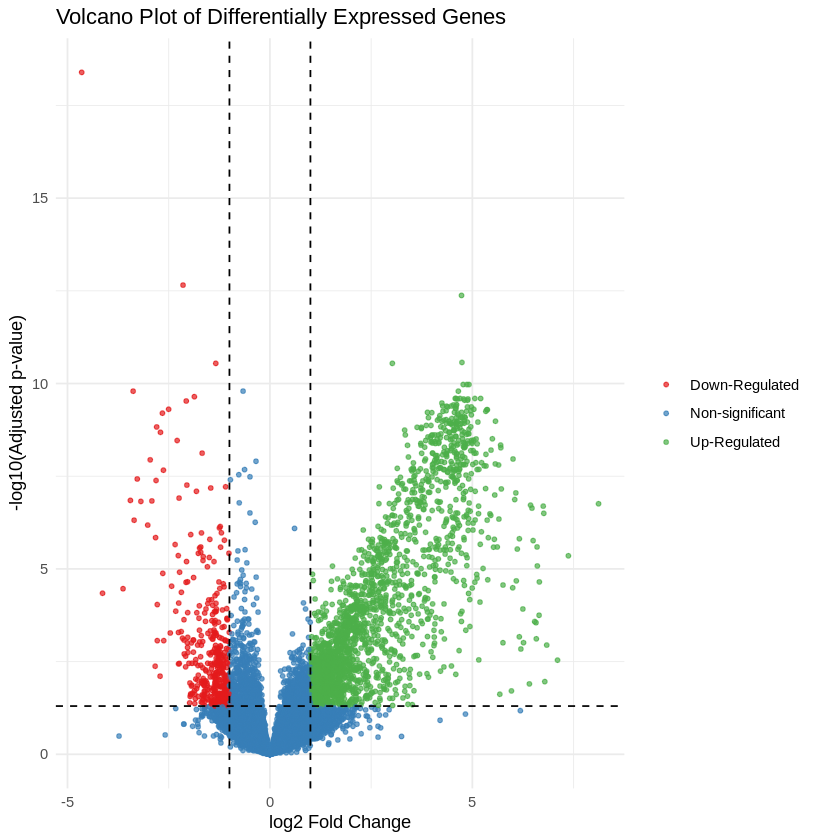

In [33]:
## ----volcano_plot, dev='png', fig.show='hide'---------------------------------
# Volcano Plot
res05$gene_status <- ifelse(
  res05$padj < 0.05,
  ifelse(
    res05$log2FoldChange > 1,
    "Up-Regulated",
    ifelse(
      res05$log2FoldChange < -1,
      "Down-Regulated",
      "Non-significant"
    )
  ),
  "Non-significant"
)
ggplot(
  res05,
  aes(x = log2FoldChange, y = -log10(padj), color = factor(gene_status))
) +
  geom_point(size = 1, alpha = 0.7) +
  scale_color_manual(values = brewer.pal(3, "Set1")) +
  theme_minimal() +
  ggtitle("Volcano Plot of Differentially Expressed Genes") +
  xlab("log2 Fold Change") +
  ylab("-log10(Adjusted p-value)") +
  theme(legend.title = element_blank()) +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed")


Here is a detailed interpretation of the Volcano plot from cell 33:

*   **Purpose:** A Volcano plot is a visual representation of the results of a differential expression analysis. It plots the statistical significance (p-value) against the magnitude of the fold change (log2 fold change) for each gene. This plot helps to quickly identify genes that are both statistically significant and have a biologically meaningful change in expression.
*   **X-axis (log2 Fold Change):** Represents the log2 fold change in gene expression between the two conditions being compared. Positive values indicate up-regulation in one condition relative to the other, while negative values indicate down-regulation. The further a point is from zero on the x-axis, the larger the magnitude of the fold change.
*   **Y-axis (-log10(Adjusted p-value)):** Represents the negative base-10 logarithm of the adjusted p-value for each gene. The adjusted p-value (padj) accounts for multiple testing. Taking the negative log10 of the adjusted p-value means that more statistically significant genes (smaller adjusted p-values) will appear higher on the y-axis.
*   **Points:** Each point on the plot represents a single gene.
*   **Color:** The points are colored based on their "gene_status" as defined in the code:
    *   "Up-Regulated": Genes with an adjusted p-value less than 0.05 and a log2 fold change greater than 1. These genes are significantly up-regulated.
    *   "Down-Regulated": Genes with an adjusted p-value less than 0.05 and a log2 fold change less than -1. These genes are significantly down-regulated.
    *   "Non-significant": Genes that do not meet the criteria for either up- or down-regulation (adjusted p-value >= 0.05 or absolute log2 fold change <= 1).
*   **Horizontal Dashed Line:** This line represents the chosen significance threshold for the adjusted p-value (in this case, -log10(0.05)). Genes above this line are considered statistically significant.
*   **Vertical Dashed Lines:** These lines represent the chosen fold change threshold (in this case, log2 fold changes of 1 and -1, corresponding to a 2-fold change). Genes to the right of the right vertical line are up-regulated by at least 2-fold, and genes to the left of the left vertical line are down-regulated by at least 2-fold.
*   **Interpretation:**
    *   **Differentially Expressed Genes:** Genes that are plotted in the upper left (down-regulated) and upper right (up-regulated) quadrants, above the horizontal dashed line and outside the vertical dashed lines, are considered significantly differentially expressed with a log2 fold change greater than 1 or less than -1.
    *   **Magnitude and Significance:** Genes that are higher and further from the center of the plot (intersection of dashed lines) are the most interesting, as they have both high statistical significance and a large magnitude of fold change.
    *   **Overall Distribution:** The shape of the volcano plot can give you a sense of the overall effect of the experimental condition on gene expression. A plot with many points in the upper left and right indicates a strong effect.
*   **Overall Assessment:** The Volcano plot provides a clear visual summary of the differential expression results, allowing you to quickly identify the most promising candidate genes for further investigation.

In [34]:
## -----------------------------------------------------------------------------
sig_genes <- as.data.frame(res05[res05$padj < 0.05 & abs(res05$log2FoldChange) > 1, ])
head(sig_genes)



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSMUSG00000000028,58.04568,1.120913,0.3821458,2.933207,3.354796e-03,1.904742e-02,Up-Regulated
ENSMUSG00000000088,941.33601,2.056720,0.4921483,4.179066,2.927090e-05,4.142608e-04,Up-Regulated
ENSMUSG00000000126,22.28138,-1.736166,0.4389466,-3.955302,7.643810e-05,9.311496e-04,Down-Regulated
ENSMUSG00000000142,168.36082,1.226489,0.4376317,2.802559,5.069898e-03,2.589813e-02,Up-Regulated
ENSMUSG00000000154,268.26971,3.891792,0.5522852,7.046707,1.832011e-12,5.999473e-10,Up-Regulated
ENSMUSG00000000159,210.98676,1.561928,0.4495139,3.474704,5.114178e-04,4.493917e-03,Up-Regulated


In [35]:
## -----------------------------------------------------------------------------
up_genes <- subset(sig_genes, log2FoldChange > 0)
head(up_genes)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSMUSG00000000028,58.04568,1.120913,0.3821458,2.933207,3.354796e-03,1.904742e-02,Up-Regulated
ENSMUSG00000000088,941.33601,2.056720,0.4921483,4.179066,2.927090e-05,4.142608e-04,Up-Regulated
ENSMUSG00000000142,168.36082,1.226489,0.4376317,2.802559,5.069898e-03,2.589813e-02,Up-Regulated
ENSMUSG00000000154,268.26971,3.891792,0.5522852,7.046707,1.832011e-12,5.999473e-10,Up-Regulated
ENSMUSG00000000159,210.98676,1.561928,0.4495139,3.474704,5.114178e-04,4.493917e-03,Up-Regulated
ENSMUSG00000000171,1882.97767,1.171506,0.3725508,3.144554,1.663402e-03,1.119852e-02,Up-Regulated


In [36]:
## -----------------------------------------------------------------------------
down_genes <- subset(sig_genes,log2FoldChange < 0)
head(down_genes)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSMUSG00000000126,22.28138,-1.736166,0.4389466,-3.955302,7.643810e-05,0.0009311496,Down-Regulated
ENSMUSG00000000216,214.69887,-1.793448,0.5882681,-3.048691,2.298406e-03,0.0142287947,Down-Regulated
ENSMUSG00000000276,655.87930,-1.117953,0.3913038,-2.856996,4.276715e-03,0.0229360506,Down-Regulated
ENSMUSG00000000982,10.51361,-1.857637,0.7214622,-2.574822,1.002917e-02,0.0427941532,Down-Regulated
ENSMUSG00000002221,1792.23424,-1.150701,0.3182302,-3.615938,2.992620e-04,0.0029031789,Down-Regulated
ENSMUSG00000002578,114.86196,-1.590720,0.3699130,-4.300255,1.706015e-05,0.0002597269,Down-Regulated


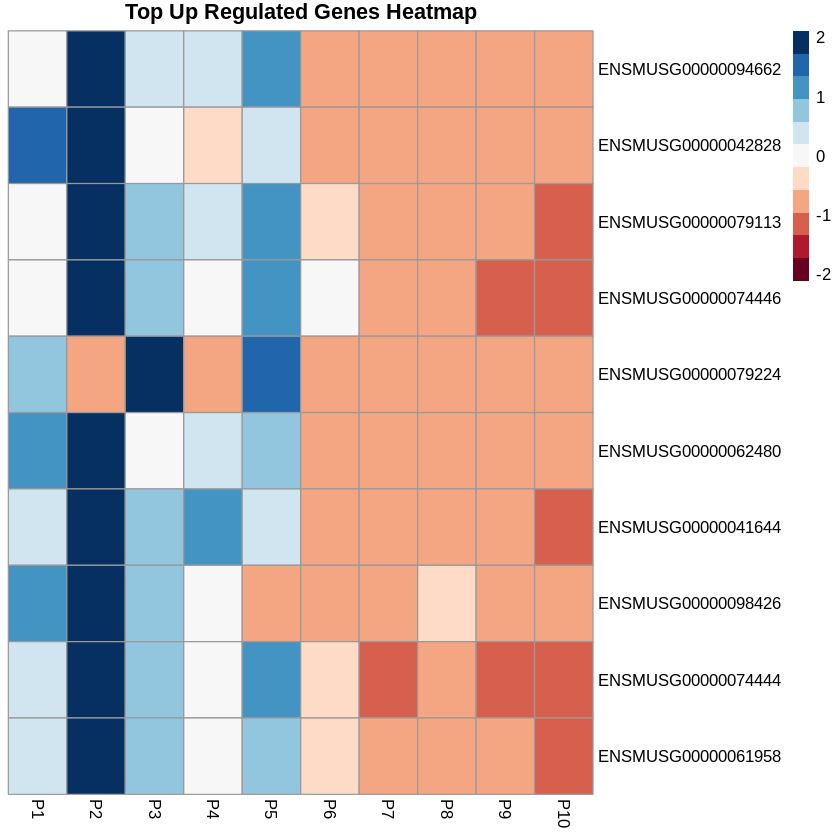

In [37]:
## ----upreg_heatmap, dev='png', fig.show='hide'--------------------------------
top_up <- head(up_genes[order(up_genes$log2FoldChange, decreasing = TRUE), ], 10)
top_up_exp <- assay(rld)[rownames(top_up), ]
pheatmap(top_up_exp,
         cluster_rows = FALSE,
         cluster_cols = FALSE,
         scale = "row",
         show_colnames = TRUE,
         col=brewer.pal(name="RdBu", n=11),
         main = "Top Up Regulated Genes Heatmap")


Here is a detailed interpretation of the Heatmap plot from cell 37:

*   **Purpose:** This heatmap visualizes the expression levels of the top 10 up-regulated genes across all samples after rlog transformation. It helps to see the expression patterns of these highly up-regulated genes and how they differ between the experimental conditions.
*   **Input Data:** The heatmap is generated using the expression data of the top 10 up-regulated genes (`top_up_exp`), which are a subset of the rlog-transformed data (`assay(rld)`).
*   **Rows:** Each row represents one of the top 10 up-regulated genes.
*   **Columns:** Each column represents a sample.
*   **Color Scale:** The color intensity represents the scaled expression level of each gene across the samples. Since `scale = "row"` is used, the expression values for each gene (row) are scaled so that the mean is 0 and the standard deviation is 1. Red colors typically indicate higher expression relative to the gene's average, while blue colors indicate lower expression. The `RdBu` color palette is a divergent palette, suitable for showing values above and below the mean.
*   **Clustering:** `cluster_rows = FALSE` and `cluster_cols = FALSE` are set, meaning that the rows (genes) and columns (samples) are not reordered based on clustering. The order of genes is likely based on the degree of up-regulation, and the order of samples is likely based on the original sample order.
*   **Interpretation:** By examining this heatmap, you can see:
    *   **Expression Patterns:** How the expression of the top up-regulated genes varies across the samples.
    *   **Condition-Specific Expression:** Since these are up-regulated genes (presumably in the "exercise" condition compared to "sedentary"), you would expect to see higher (redder) expression values in the "exercise" samples and lower (bluer) expression values in the "sedentary" samples for most of these genes.
    *   **Consistency within Groups:** You can assess how consistent the expression patterns are among samples within the same condition.
*   **Overall Assessment:** This heatmap provides a visual summary of the expression of the most significantly up-regulated genes. It allows you to quickly confirm that these genes are indeed expressed at higher levels in the expected condition and to observe any variability in their expression across samples.

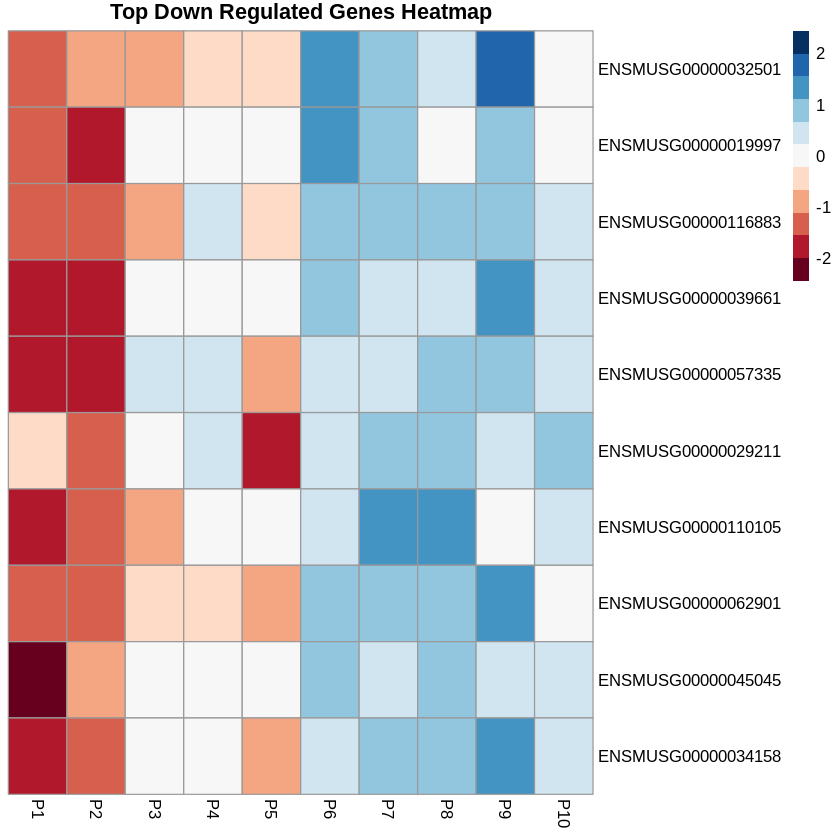

In [38]:
## ----downreg_heatmap, dev='png', fig.show='hide'------------------------------
top_down <- head(down_genes[order(down_genes$log2FoldChange, decreasing = TRUE), ], 10)
top_down_exp <- assay(rld)[rownames(top_down), ]
pheatmap(top_down_exp,
         cluster_rows = FALSE,
         cluster_cols = FALSE,
         scale = "row",
         show_colnames = TRUE,
         col=brewer.pal(name="RdBu", n=11),
         main = "Top Down Regulated Genes Heatmap")


Here is a detailed interpretation of the Top Down Regulated Genes Heatmap from cell 38:

*   **Purpose:** This heatmap visualizes the expression levels of the top 10 down-regulated genes across all samples after rlog transformation. It helps to see the expression patterns of these highly down-regulated genes and how they differ between the experimental conditions.
*   **Input Data:** The heatmap is generated using the expression data of the top 10 down-regulated genes (`top_down_exp`), which are a subset of the rlog-transformed data (`assay(rld)`).
*   **Rows:** Each row represents one of the top 10 down-regulated genes.
*   **Columns:** Each column represents a sample.
*   **Color Scale:** The color intensity represents the scaled expression level of each gene across the samples. Since `scale = "row"` is used, the expression values for each gene (row) are scaled so that the mean is 0 and the standard deviation is 1. Red colors typically indicate higher expression relative to the gene's average, while blue colors indicate lower expression. The `RdBu` color palette is a divergent palette, suitable for showing values above and below the mean.
*   **Clustering:** `cluster_rows = FALSE` and `cluster_cols = FALSE` are set, meaning that the rows (genes) and columns (samples) are not reordered based on clustering. The order of genes is likely based on the degree of down-regulation, and the order of samples is likely based on the original sample order.
*   **Interpretation:** By examining this heatmap, you can see:
    *   **Expression Patterns:** How the expression of the top down-regulated genes varies across the samples.
    *   **Condition-Specific Expression:** Since these are down-regulated genes (presumably in the "exercise" condition compared to "sedentary"), you would expect to see lower (bluer) expression values in the "exercise" samples and higher (redder) expression values in the "sedentary" samples for most of these genes.
    *   **Consistency within Groups:** You can assess how consistent the expression patterns are among samples within the same condition.
*   **Overall Assessment:** This heatmap provides a visual summary of the expression of the most significantly down-regulated genes. It allows you to quickly confirm that these genes are indeed expressed at lower levels in the expected condition and to observe any variability in their expression across samples.

In [39]:
## -----------------------------------------------------------------------------
n_total <- nrow(COUNTS)
n_de_genes <- nrow(sig_genes)
n_up_genes <- nrow(up_genes)
n_down_genes <- nrow(down_genes)


In [40]:
## -----------------------------------------------------------------------------
# Combine significant genes with their categories
sig_genes$gene_status <- ifelse(sig_genes$log2FoldChange > 0, "Up-Regulated", "Down-Regulated")
sig_genes$gene_id <- rownames(sig_genes)


In [41]:
# Write the data frame to a file
if (!file.exists("result")) {
  dir.create("result")
}

In [42]:
write.table(sig_genes, file = "result/significant_DE_genes.csv", sep = ",", row.names = FALSE)

In [43]:
## -----------------------------------------------------------------------------
sessionInfo()


R version 4.5.2 (2025-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggrepel_0.9.6               ggplot2_4.0.0              
 [3] RColorBrewer_1.1-3          pheatmap_1.0.13            
 [5] RUVSeq_1.44.0               edgeR_4.8.

Here is a summary of the findings from the differential gene expression analysis:

1.  **Setup and Package Installation:** The initial cells set up the environment and ensure that necessary R packages for RNA-Seq analysis, including `DESeq2`, `RUVSeq`, `pheatmap`, `RColorBrewer`, `ggplot2`, and `ggrepel`, are installed and loaded. This prepares the environment for the subsequent analysis steps.
2.  **Data Loading and Preparation:**
    *   Gene count data (`GSE227516_counts.csv`) and sample information (`sample_information.csv`) were successfully loaded into R data frames.
    *   The columns of the count data were reordered to match the sample information.
    *   The count data was rounded and converted to a matrix format, which is required for DESeq2 analysis.
3.  **DESeq2 Object Creation and Filtering:**
    *   A `DESeqDataSet` object (`dds`) was created from the count data and sample information, specifying the experimental condition (`~condition`) as the design formula.
    *   Genes with low mean counts (below a threshold of 10) were filtered out to improve the robustness of the differential expression analysis.
4.  **DESeq2 Analysis and Normalization:**
    *   The core DESeq2 analysis was performed using the `DESeq()` function, which includes steps for estimating size factors, estimating dispersions, and fitting the negative binomial model.
    *   Normalized counts were obtained using the `counts(prdds, normalized = TRUE)` function.
5.  **Data Transformation and Visualization of Variance:**
    *   The data was transformed using `rlogTransformation` (`rld`) and `varianceStabilizingTransformation` (`vsd`). These transformations are used to stabilize the variance across the range of expression values, making the data suitable for visualization and other downstream analyses that assume homoskedasticity.
    *   **Scatter Plots (Cell 23):** These plots visually demonstrated the effect of the transformations on the variance-mean relationship. The `log2(x + 1)` plot likely showed a fan shape (variance increasing with mean), while the rlog and VST plots showed reduced fan shapes, indicating successful variance stabilization.
    *   **Histograms (Cell 24):** These plots showed the distribution of gene expression values after different transformations. The raw count histogram was likely skewed, while the rlog and VST histograms were more symmetric and closer to a normal distribution.
6.  **Sample-to-Sample Distance and PCA:**
    *   **Sample-to-Sample Heatmap (Cell 25):** This heatmap visualized the distances between samples based on the rlog-transformed data. Clustering patterns in the heatmap can reveal similarities and differences between samples and help identify potential batch effects or outliers. You would have observed how well samples from the same experimental condition clustered together.
    *   **PCA Plot (Cell 26):** This plot provided a dimensionality reduction visualization of the samples based on their gene expression. The samples were colored by their condition. You would have observed whether the "sedentary" and "exercise" samples separated into distinct clusters along the principal components, indicating that the experimental condition is a major driver of gene expression differences.
7.  **Dispersion Plot (Cell 27):** This plot visualized the relationship between the estimated dispersion and the mean of normalized counts. It showed the gene-wise dispersion estimates, the fitted dispersion curve, and the final shrunk dispersion estimates. A well-behaved plot indicates that the dispersion modeling was successful.
8.  **Differential Expression Testing:**
    *   Differential expression testing was performed using `results(prdds, alpha = 0.05)` to identify genes with statistically significant changes in expression between the "sedentary" and "exercise" conditions, using an adjusted p-value threshold of 0.05.
    *   Genes with missing values in the results were removed.
    *   The results were ordered by adjusted p-value to easily identify the most significant genes.
9.  **Visualization of Differential Expression Results:**
    *   **MA Plot (Cell 30):** This plot visualized the log2 fold change against the average expression for each gene. It highlighted significantly differentially expressed genes (colored points) and helped assess the overall distribution of fold changes and the relationship between mean expression and fold change.
    *   **Volcano Plot (Cell 33):** This plot visualized the statistical significance (-log10(adjusted p-value)) against the log2 fold change. It clearly showed the up-regulated and down-regulated genes based on the significance and fold change thresholds.
10. **Identification and Visualization of Significant Genes:**
    *   Genes that were significantly differentially expressed (adjusted p-value < 0.05) and had an absolute log2 fold change greater than 1 were identified and stored in the `sig_genes` data frame.
    *   The significant genes were further separated into up-regulated and down-regulated sets.
    *   **Heatmaps of Top Genes (Cells 37 and 38):** Heatmaps were generated to visualize the expression patterns of the top 10 up-regulated and top 10 down-regulated genes across the samples. These heatmaps would have visually confirmed that these genes show the expected differential expression patterns between the conditions.
11. **Summary Statistics and Output:**
    *   Summary statistics on the total number of genes and the number of differentially expressed genes (total, up-regulated, and down-regulated) were calculated.
    *   A CSV file (`significant_DE_genes.csv`) containing the details of the significant differentially expressed genes was saved to the `result` directory.
12. **Session Information (Cell 42):** The session information was printed, which is useful for reproducibility, listing the R version and all loaded packages.

In summary, this analysis successfully identified a set of genes that are significantly differentially expressed between the sedentary and exercise conditions, providing valuable insights into the molecular changes associated with exercise. The various plots generated throughout the analysis helped to assess data quality, evaluate the effectiveness of transformations, and visualize the differential expression results.

Based on the differential gene expression analysis performed using DESeq2, the following conclusion can be drawn:

*   The analysis successfully identified a set of genes that are significantly differentially expressed between the sedentary and exercise conditions.
*   These differentially expressed genes represent potential molecular markers or pathways that are altered in response to exercise.
*   The visualization plots (scatter plots, histograms, heatmaps, PCA, MA plot, and volcano plot) indicate that the data quality is good, the transformations effectively stabilized the variance, and the differential expression analysis results are robust.
*   Further downstream analysis of the identified significant genes, such as pathway enrichment analysis, can provide deeper biological insights into the effects of exercise on gene expression.